In [1]:
import numpy as np

In [2]:
input_data= np.array([[0,0],[0,1],[1,0],[1,1]])

In [3]:
def AND_gate(x):
    w1=0.5
    w2=0.5
    b=-0.7

    result=x[0]*w1 +x[1]*w2+b
    if result<=0:
        return 0
    else:
        return 1

In [4]:
result=[]
for x in input_data:
    result.append(AND_gate(x))

print(result)

[0, 0, 0, 1]


In [5]:
def NAND_gate(x):
    w1=-0.5
    w2=-0.5
    b=0.7

    result=x[0]*w1 +x[1]*w2+b
    if result<=0:
        return 0
    else:
        return 1

In [6]:
result=[]
for x in input_data:
    result.append(NAND_gate(x))

print(result)

[1, 1, 1, 0]


In [7]:
def OR_gate(x):
    w1=0.6
    w2=0.6
    b=-0.5

    result=x[0]*w1 +x[1]*w2+b
    if result<=0:
        return 0
    else:
        return 1

In [9]:
result=[]
for x in input_data:
    result.append(OR_gate(x))

print(result)

[0, 1, 1, 1]


### XOR 연산은 게이트로 작성 불가함  

### 다층 퍼셉트론(MultiLayer Perceptron, MLP) 사용

In [10]:
s1=[]
s2=[]
new_input=[]
final_output=[]

for i in range(len(input_data)):
    s1=NAND_gate(input_data[i])
    s2=OR_gate(input_data[i])
    new_input.append(s1)
    new_input.append(s2)

    result=AND_gate(new_input)
    final_output.append(result)
    new_input=[]
print(final_output)


[0, 1, 1, 0]


### 아래도 실행 결과는 동일함!

In [12]:
s1=[]
s2=[]
new_input=[]
final_output=[]

for data in input_data:
    s1=NAND_gate(data)
    s2=OR_gate(data)
    new_input.append(s1)
    new_input.append(s2)

    result=AND_gate(new_input)
    final_output.append(result)
    new_input=[]
print(final_output)


[0, 1, 1, 0]


In [13]:
def XOR_gate(x):
    s1=[]
    s2=[]
    new_input=[]
    final_output=[]

    for data in x:
        s1=NAND_gate(data)
        s2=OR_gate(data)
        new_input.append(s1)
        new_input.append(s2)

        result=AND_gate(new_input)
        final_output.append(result)
        new_input=[]
    return final_output

In [14]:
XOR_gate(input_data)

[0, 1, 1, 0]

## 딥러닝 방식으로 XOR_gate 해결 ??
### 인공신경망으로 구현 

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [19]:
x=torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y=torch.FloatTensor([[0],[1],[1],[0]])

In [21]:
model=nn.Sequential(
    nn.Linear(2,10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10,1, bias=True),
    nn.Sigmoid()
)

In [23]:
criterion=torch.nn.BCELoss()
optimizer=optim.SGD(model.parameters(), lr=1)

In [24]:
for epoch in range(10001):
    optimizer.zero_grad()

    y_hat=model(x)
    cost=criterion(y_hat, y)
    cost.backward()
    optimizer.step()

    if epoch%1000==0:
        print(epoch, cost.item())

0 0.6935425996780396
1000 0.6930655837059021
2000 0.6926190257072449
3000 0.013960490003228188
4000 0.0007098978385329247
5000 0.00033609193633310497
6000 0.00021615443984046578
7000 0.0001580755488248542
8000 0.00012399596744216979
9000 0.00010170674067921937
10000 8.609257929492742e-05


In [31]:
with torch.no_grad():
    h=model(x)
    prediction=(h>0.5).float()
    accuray=(prediction==y).float().mean()
    print(h)
    print(prediction)
    print(accuray)
    print(y)
    print(list(model.parameters()))

tensor([[6.5956e-05],
        [9.9992e-01],
        [9.9991e-01],
        [1.0659e-04]])
tensor([[0.],
        [1.],
        [1.],
        [0.]])
tensor(1.)
tensor([[0.],
        [1.],
        [1.],
        [0.]])
[Parameter containing:
tensor([[-1.1326, -1.1781],
        [-0.4615, -0.8896],
        [ 0.9200,  1.3787],
        [-0.2840,  2.4192],
        [ 3.4773,  3.3814],
        [-0.4030, -1.1223],
        [-1.5731, -1.9032],
        [-0.1651, -1.2842],
        [-5.5870, -5.4917],
        [ 3.5642, -1.3945]], requires_grad=True), Parameter containing:
tensor([ 1.3807, -0.3275, -1.3950, -0.4237, -0.5051,  0.0396,  2.4911, -0.1100,
         1.9401,  0.3349], requires_grad=True), Parameter containing:
tensor([[ 0.0389,  0.1816, -0.2534, -0.2519,  0.1332,  0.2645,  0.2206,  0.3430,
         -1.0019, -0.8369],
        [ 0.5766,  0.0773, -0.6192, -0.6644,  0.7068,  0.1692,  0.9054,  0.2430,
         -1.5318, -0.6262],
        [-0.0297,  0.3044, -0.2533, -0.4162,  0.3746, -0.0512, -0.0205,

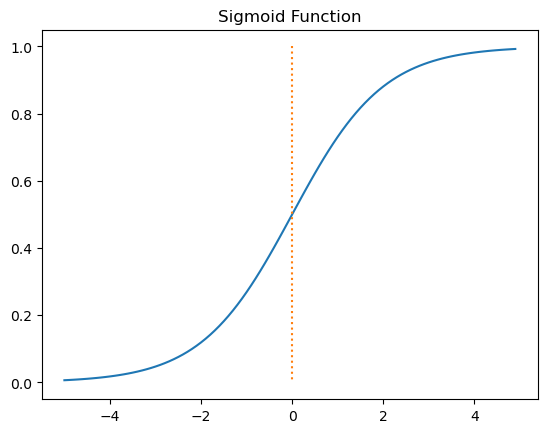

In [33]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0],':')
plt.title("Sigmoid Function")
plt.show()

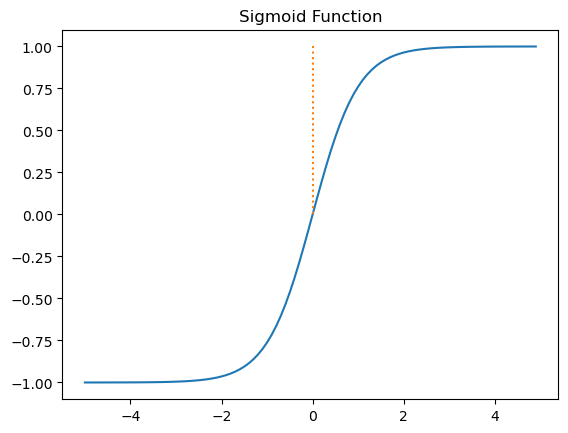

In [34]:
x=np.arange(-5.0,5.0,0.1)
y=np.tanh(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0],':')
plt.title("Sigmoid Function")
plt.show()

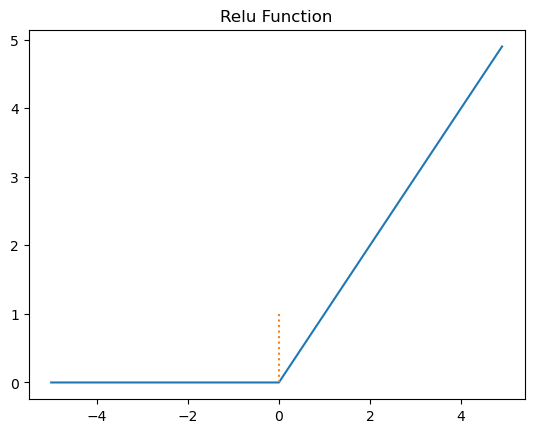

In [39]:
def relu(x):
    return np.maximum(0,x)

x=np.arange(-5.0,5.0,0.1)
y=relu(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0],':')
plt.title("Relu Function")
plt.show()

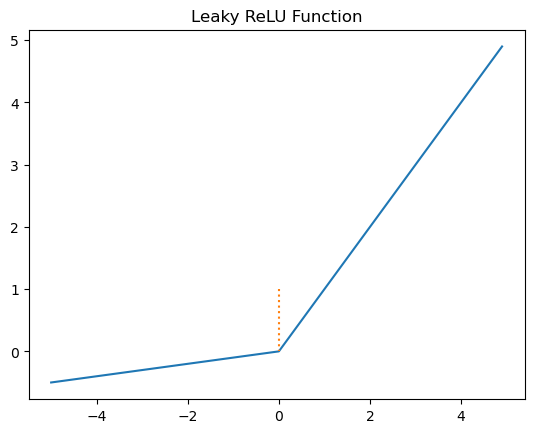

In [41]:
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x,x)

x=np.arange(-5.0,5.0,0.1)
y=leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0],':')
plt.title("Leaky ReLU Function")
plt.show()

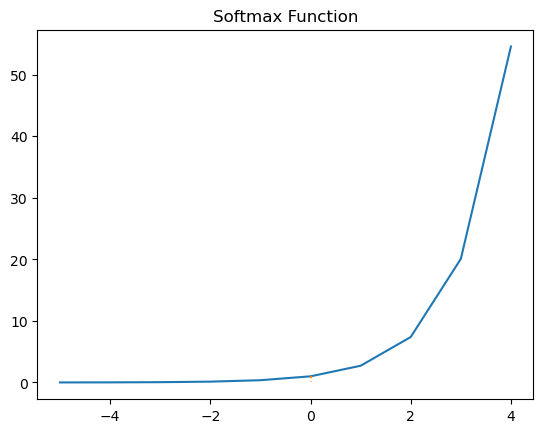

In [42]:
x=np.arange(-5.0,5.0,1)
y=np.exp(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0],':')
plt.title("Softmax Function")
plt.show()